## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs (---> Field Programmable Gate Arrays). Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/user\labcomput\data\data_000637.t

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rng=np.random.default_rng(seed=18)

In [ ]:
path=r'\\wsl.localhost\Ubuntu\home\user\labcomput\data\lab5\data_000637.txt'
df=pd.read_csv(path)
N=10001
sel_df=df[:N].copy()

In [ ]:
print("total original length:", len(df), '\n')
print(sel_df.head())

2\. Find out the number of BX in a ORBIT (the value 'x').

In [ ]:
# ---> ie find maximum value of BX_COUNTER
#      (like finding how many minutes in an hour: 14h57min, 14h58min, 14h59min, 15h00min, ... 
#      therefore 59+1 minutes in an hour)
x=sel_df["BX_COUNTER"].max()+1
print(x)

In [ ]:
sel_df.max()

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [ ]:
# ---> NB meaning of the assignment:
ns_in_one_orbit=x*25
first_row=df.iloc[0]
#y=len(df)-1
last_row=df.iloc[-1] # ---> NB this
#print(first_row, '\n', last_row)
total_time = (last_row["ORBIT_CNT"]-first_row["ORBIT_CNT"]) * ns_in_one_orbit + (last_row["BX_COUNTER"]-first_row["BX_COUNTER"]) * 25 + (last_row["TDC_MEAS"]-first_row["TDC_MEAS"]) * 25/30
# ---> last two terms either + or -; if in chronological order (double check?)
print("Total acquisition time:", total_time, "ns, ie.", total_time/(1e9), "s") 

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [ ]:
sel_df["Absolute time (ns)"]=((ns_in_one_orbit*sel_df["ORBIT_CNT"] + 25*sel_df["BX_COUNTER"] + 25/30*sel_df["TDC_MEAS"]))

In [ ]:
print(sel_df.iloc[0::1000,2:]) # ---> NB this to select by index, .loc to select by label

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [ ]:
sel_df.iloc[1:,0]=rng.integers(low=0, high=2, size=(len(sel_df)-1)) 
print(sel_df[0::1000])

6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [ ]:
new_sel_df=sel_df[sel_df['HEAD'] > 0]
print(new_sel_df[0:20]) # ---> NB old indices

In [ ]:
print(new_sel_df.iloc[-1,-1]) # ---> ok

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [ ]:
first_fpga=sel_df[sel_df['FPGA']>0.5]['TDC_CHANNEL']
second_fpga=sel_df[sel_df['FPGA']<0.5]['TDC_CHANNEL']
f_counts=first_fpga.value_counts().sort_index() # ---> NB have to sort indexes
s_counts=second_fpga.value_counts().sort_index()
print(f_counts, '\n', f_counts.keys())

In [ ]:
#f_hist.hist(legend=True) 

In [ ]:
#s_hist.hist(legend=True)

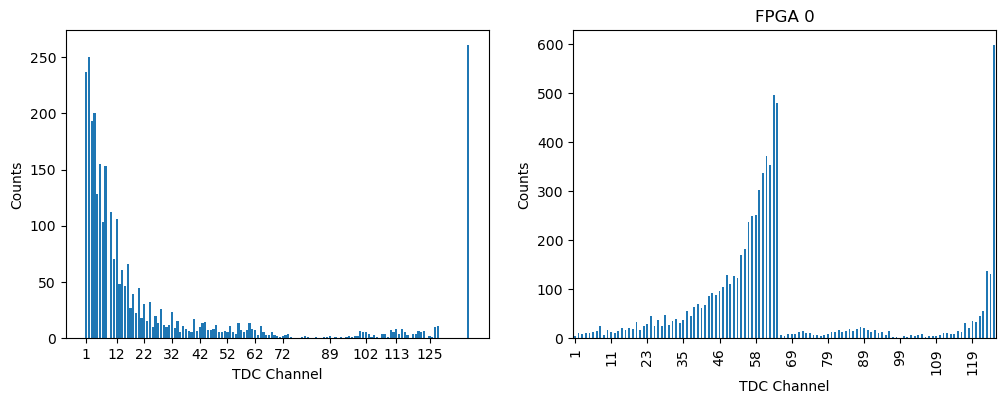

In [44]:
#---> NB all of this
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
#f_counts.plot(kind='bar', ax=ax1, title='FPGA 1')
s_counts.plot(kind='bar', ax=ax2, title='FPGA 0')
ax1.bar(f_counts.keys(), f_counts) #---> NB simply this
ax1.set_xlabel('TDC Channel')
ax1.set_ylabel('Counts')
ax2.set_xlabel('TDC Channel')
ax2.set_ylabel('Counts')
ax1.set_xticks(f_counts.keys()[::10])
ax2.set_xticks(ax2.get_xticks()[::10])
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [ ]:
counts_table=sel_df.groupby("TDC_CHANNEL")["FPGA"].count() 
# ---> NB have to specify column on which to perform operation
counts=counts_table.sort_values(ascending=False)
print(counts.head(3))

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [ ]:
#---> NB "unique orbits" meaning group them by "ORBIT_CNT" value
n_unique_orbits = df['ORBIT_CNT'].nunique() # ---> NB only 2 in whole dataset
# ---> NB this method
df_fxdch=df[df['TDC_CHANNEL']==139]
n_unique_orbits_fxdch=df_fxdch['ORBIT_CNT'].nunique()
print(n_unique_orbits,'\n', n_unique_orbits_fxdch)